In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<function matplotlib.pyplot.show(close=None, block=None)>

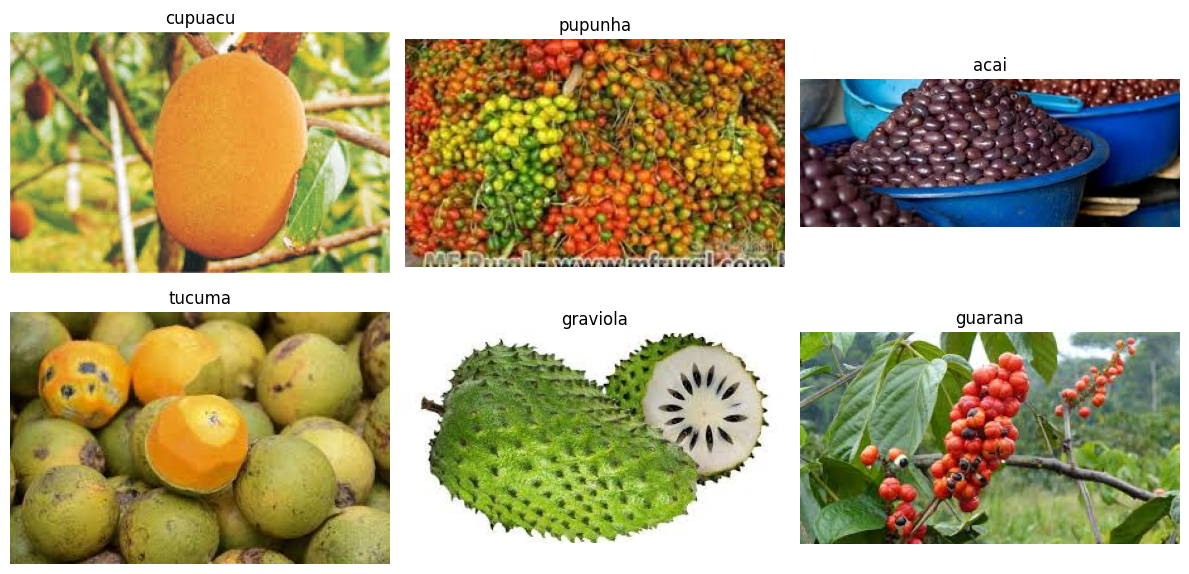

In [ ]:
train_dir = "/content/drive/MyDrive/train"

class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

selected_images = {}
for class_name in class_dirs:
  class_path = os.path.join(train_dir, class_name)
  images = [img for img in os.listdir(class_path) if img.endswith(('jpg', 'png', 'jpeg'))]

  if images:
    selected_images[class_name] = os.path.join(class_path, random.choice(images))

num_images = len(selected_images)
num_cols = (num_images + 1) // 2
fig, axes = plt.subplots(2, num_cols, figsize=(12, 6))
axes = axes.flatten() if num_images > 1 else [axes]

for ax, (class_name, img_path) in zip(axes, selected_images.items()):
  img = mpimg.imread(img_path)
  ax.imshow(img)
  ax.set_title(class_name)
  ax.axis('off')

plt.tight_layout()
plt.show

Task-2

In [ ]:
from PIL import Image
corrupted_images = []

for class_name in class_dirs:
  class_path = os.path.join(train_dir, class_name)
  images = [img for img in os.listdir(class_path) if img.endswith(('jpg', 'png', 'jpeg'))]

  for img_name in images:
    img_path = os.path.join(class_path, img_name)
    try:
      with Image.open(img_path) as img:
        img.verify()
    except (IOError, SyntaxError):
      corrupted_images.append(img_path)

if corrupted_images:
  print("Corrupted images found:")
  for img_path in corrupted_images:
    print(img_path)
else:
  print("No corrupted images found.")


No corrupted images found.


In [ ]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

train_dir = "/content/drive/MyDrive/train"

rescale = tf.keras.layers.Rescaling(1.0 / 255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=True,
    seed=123,
    validation_split=validation_split,
    subset="training",
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset="validation",
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))

print(f"Training dataset batches: {len(train_ds)}")
print(f"Validation dataset batches: {len(val_ds)}")

for images, labels in train_ds.take(1):
  print(f"Image batch shape: {images.shape}")
  print(f"Label batch shape: {labels.shape}")



Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training dataset batches: 3
Validation dataset batches: 1
Image batch shape: (32, 128, 128, 3)
Label batch shape: (32,)
